In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [8]:
print(df.shape)
print(df.info())
print(df.describe())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479  

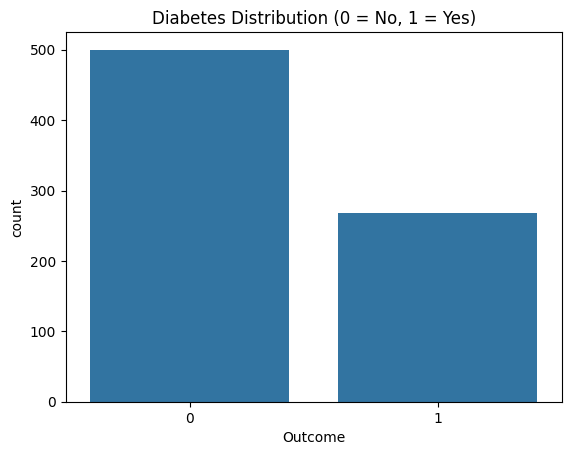

In [9]:
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Distribution (0 = No, 1 = Yes)")
plt.show()

In [10]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Split Dataset

In [11]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models

**Logistic Regression**



In [14]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred_log = log_model.predict(X_test)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



**ٌRandom Forest Classifier**

In [65]:
rf_model = RandomForestClassifier(n_estimators=300 ,max_depth= 6,min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=5, n_estimators=300,
                       random_state=42)

In [67]:
y_pred_rf = rf_model.predict(X_test)

In [68]:
print("🌳 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🌳 Random Forest Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



# comparison


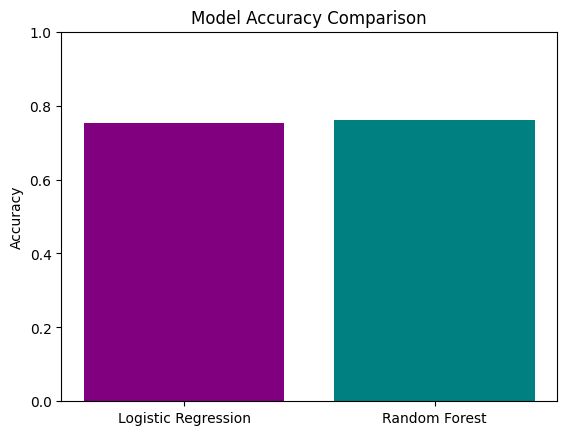

In [77]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest']
accuracy = [0.753, 0.76]
plt.bar(models, accuracy, color=['purple', 'teal'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()


**Feature Importance**

                    Feature  Importance
1                   Glucose    0.318615
5                       BMI    0.183555
7                       Age    0.157063
6  DiabetesPedigreeFunction    0.095551
4                   Insulin    0.069092
0               Pregnancies    0.067365
2             BloodPressure    0.057397
3             SkinThickness    0.051362


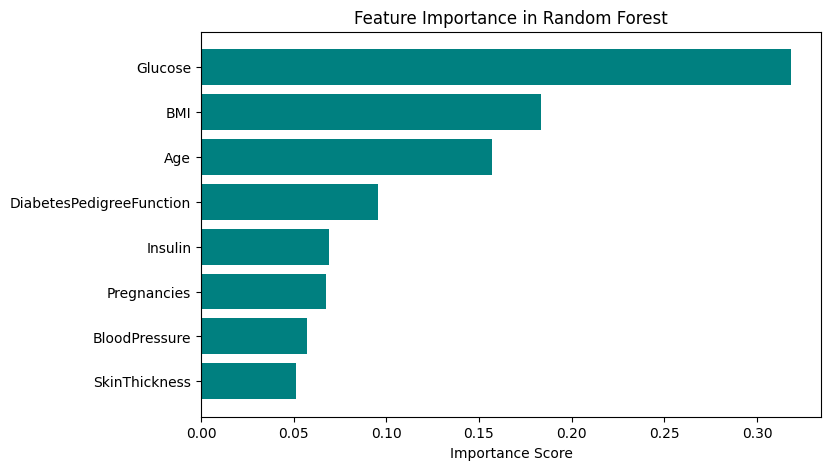

In [76]:
importances = rf_model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.gca().invert_yaxis()
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.show()
